In [ ]:
import pandas as pd

data=pd.read_csv("loadmetro.csv" )

#data

In [ ]:
# Specify the columns you want to keep
columns_to_keep = ['datetime','Load', 'PRECTOTCORR']

# Use indexing to select the desired columns
df = data[columns_to_keep]
# set the 'datetime_column' as the index
df.set_index('datetime', inplace=True)
df

,Load,PRECTOTCORR
datetime,,
2019-03-21 00:00:00,352.862799,0.0
2019-03-21 01:00:00,330.444853,0.0
2019-03-21 02:00:00,287.419792,0.0
2019-03-21 03:00:00,258.110368,0.0
2019-03-21 04:00:00,247.745866,0.0
...,...,...
2021-09-22 19:00:00,632.235500,0.0
2021-09-22 20:00:00,612.703162,0.0
2021-09-22 21:00:00,589.574385,0.0


In [ ]:
train_size = int(len(df) * 0.8)  # Calculate the size of the training set as 60% of the total data length
test_size = len(df) - train_size  # Calculate the size of the test set as the remaining 40% of the data

# Split the DataFrame 'df' into the training set and test set
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

print(len(train), len(test))  # Print the lengths of the training set and test set

test_size = int(len(test) * 0.5)  # Calculate the new size of the test set as 50% of the current test set length
val_size = len(test) - test_size  # Calculate the size of the validation set as the remaining 50% of the current test set

# Split the current test set into the validation set and a new test set
val, test = test.iloc[0:test_size], test.iloc[test_size:len(test)]
print(len(val), len(test))  # Print the lengths of the training set and test set


17606 4402
2201 2201


In [ ]:
"""The code performs feature scaling using MinMaxScaler from the scikit-learn library. It first fits the scaler on the training data and then applies the transformation to the training, validation, and test sets."""

from sklearn.preprocessing import MinMaxScaler  # Import the MinMaxScaler class from the sklearn.preprocessing module

f_columns = ['PRECTOTCORR']  # Define a list of column names to be transformed

f_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for feature transformation
t_transformer = MinMaxScaler()  # Create an instance of MinMaxScaler for target transformation

f_transformer = f_transformer.fit(train[f_columns].to_numpy())  # Fit the feature transformer to the training data
t_transformer = t_transformer.fit(train[['Load']])  # Fit the target transformer to the training data

train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())  # Apply feature transformation to the training data
train['Load'] = t_transformer.transform(train[['Load']])  # Apply target transformation to the training data

val.loc[:, f_columns] = f_transformer.transform(val[f_columns].to_numpy())  # Apply feature transformation to the validation data
val['Load'] = t_transformer.transform(val[['Load']])  # Apply target transformation to the validation data

test.loc[:, f_columns] = f_transformer.transform(test[f_columns].to_numpy())  # Apply feature transformation to the test data
test['Load'] = t_transformer.transform(test[['Load']])  # Apply target transformation to the test data


<ipython-input-13-aa316db434dd>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.loc[:, f_columns] = f_transformer.transform(train[f_columns].to_numpy())  # Apply feature transformation to the training data
<ipython-input-13-aa316db434dd>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Load'] = t_transformer.transform(train[['Load']])  # Apply target transformation to the training data


In [ ]:
"""The code defines a function called create_dataset that takes in input features X, target variable y, and a parameter time_steps. It creates a dataset suitable for time series forecasting by splitting the input features and target variable into sequences of length time_steps."""
import numpy as np
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []  # Initialize empty lists to store the input sequences (Xs) and corresponding target values (ys)
    for i in range(len(X) - time_steps):  # Iterate over the range of indices up to the length of X minus time_steps
        v = X.iloc[i:(i + time_steps)].values  # Extract a sequence of length time_steps from X
        Xs.append(v)  # Append the sequence to Xs
        ys.append(y.iloc[i + time_steps])  # Append the corresponding target value to ys
    return np.array(Xs), np.array(ys)  # Convert Xs and ys to NumPy arrays and return them





"""The code sets the value of time_steps to 24, which represents the number of time steps or previous observations to consider for each sample in the dataset. It then uses the create_dataset function to create training, validation, and test datasets by reshaping the input features and target variables into the appropriate format."""

time_steps = 24  # Set the number of time steps to 24

X_train, y_train = create_dataset(train, train.Load, time_steps)  # Create the training dataset using the 'create_dataset' function

X_validate, y_validate = create_dataset(val, val.Load, time_steps)  # Create the validation dataset using the 'create_dataset' function

X_test, y_test = create_dataset(test, test.Load, time_steps)  # Create the test dataset using the 'create_dataset' function

In [ ]:
print(X_train.shape,y_train.shape, X_validate.shape, y_validate.shape,X_test.shape,  y_test.shape)

(17582, 24, 2) (17582,) (2177, 24, 2) (2177,) (2177, 24, 2) (2177,)


In [ ]:
import math
from tensorflow import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

import tensorflow as tf
from keras.callbacks import EarlyStopping


In [ ]:


def build_model(num_layers, units, dropout_rates):
    model = keras.Sequential()

    for i in range(num_layers):
        return_sequences = (i != num_layers - 1)  # Set return_sequences=True for all but the last layer

        model.add(layers.LSTM(units=units[i], input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=return_sequences))
        model.add(layers.Dropout(dropout_rates[i]))

    model.add(layers.Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='mean_squared_error',
        metrics=['mae','mape'])
    return model

# Optimized hyperparameters
num_layers = 4
units = [308 , 164 , 20, 20 ]
dropout_rates = [0.3, 0.2, 0.0, 0.0]


model = build_model(num_layers, units, dropout_rates)

# Create an instance of EarlyStopping callback
custom_early_stopping = EarlyStopping(
    monitor='val_loss',  # Quantity to monitor for early stopping (validation loss)
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    verbose=1,
    start_from_epoch=20
)

history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_validate, y_validate)
    #callbacks=[custom_early_stopping]
   )

Epoch 1/100
550/550 [==============================] - 98s 165ms/step - loss: 0.0034 - mae: 0.0422 - mape: 47514.4688 - val_loss: 0.0014 - val_mae: 0.0279 - val_mape: 5.7159
Epoch 2/100
550/550 [==============================] - 90s 163ms/step - loss: 0.0011 - mae: 0.0243 - mape: 54825.9414 - val_loss: 0.0013 - val_mae: 0.0258 - val_mape: 5.3919
Epoch 3/100
550/550 [==============================] - 89s 162ms/step - loss: 9.6769e-04 - mae: 0.0224 - mape: 54415.2109 - val_loss: 0.0017 - val_mae: 0.0311 - val_mape: 6.1360
Epoch 4/100
550/550 [==============================] - 89s 161ms/step - loss: 8.6131e-04 - mae: 0.0209 - mape: 54492.3125 - val_loss: 0.0014 - val_mae: 0.0260 - val_mape: 5.3581
Epoch 5/100
550/550 [==============================] - 90s 163ms/step - loss: 7.1322e-04 - mae: 0.0189 - mape: 55462.9375 - val_loss: 9.1941e-04 - val_mae: 0.0221 - val_mape: 4.3215
Epoch 6/100
550/550 [==============================] - 89s 162ms/step - loss: 4.8568e-04 - mae: 0.0154 - mape: 547

In [ ]:
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 24, 308)           383152    
                                                                 
 dropout_8 (Dropout)         (None, 24, 308)           0         
                                                                 
 lstm_9 (LSTM)               (None, 24, 164)           310288    
                                                                 
 dropout_9 (Dropout)         (None, 24, 164)           0         
                                                                 
 lstm_10 (LSTM)              (None, 24, 20)            14800     
                                                                 
 dropout_10 (Dropout)        (None, 24, 20)            0         
                                                                 
 lstm_11 (LSTM)              (None, 20)               

In [ ]:
import pickle
# Save the trained model as a pickle string.
saved_model = pickle.dumps(history)

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("LSTM_PRECTOTCORR.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("LSTM_PRECTOTCORR.h5")
print("Saved model to disk")

Saved model to disk


dict_keys(['loss', 'mae', 'mape', 'val_loss', 'val_mae', 'val_mape'])


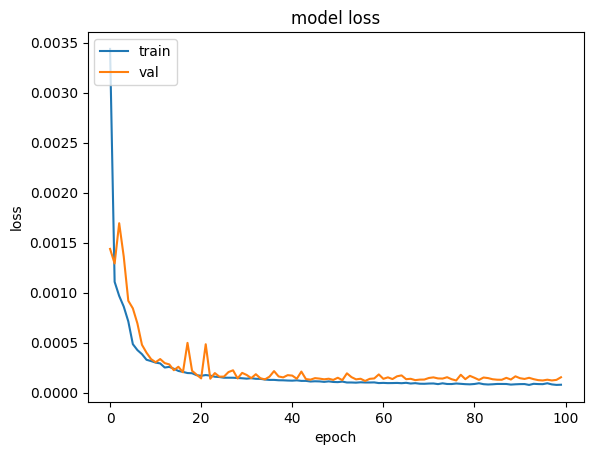

In [ ]:
from matplotlib import pyplot
import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')



In [ ]:
from math import sqrt
from sklearn.metrics import mean_squared_error


y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_validate)


#inverse
y_train_inv = t_transformer.inverse_transform(y_train.reshape(1, -1))
y_test_inv = t_transformer.inverse_transform(y_test.reshape((len(y_test), 1)))
y_pred_inv = t_transformer.inverse_transform(y_pred)

y_validate_inv = t_transformer.inverse_transform(y_validate.reshape(-1, 1))

y_pred_train_inv = t_transformer.inverse_transform(y_pred_train)
y_pred_val_inv = t_transformer.inverse_transform(y_pred_val)

69/69 [==============================] - 4s 57ms/step


In [ ]:
# calculate RMSE
rmse = sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print('Test RMSE: %.9f' % rmse)


# calculate MAE
from sklearn.metrics import mean_absolute_error
mae= mean_absolute_error(y_test_inv, y_pred_inv)
print('Test MAE: %.9f' % mae)


# calculate MAPE
from sklearn.metrics import mean_absolute_percentage_error
mape= mean_absolute_percentage_error(y_test_inv, y_pred_inv)
print('Test MAPE: %.9f' % mape)

# calculate NRMSE
actual_test=y_test_inv
Nrmse_test=rmse /(actual_test.max() - actual_test.min())
print('Test NRMSE: %.9f' % Nrmse_test)


Test RMSE: 22.074160708
Test MAE: 13.019169744
Test MAPE: 0.022309598
Test NRMSE: 0.029896578


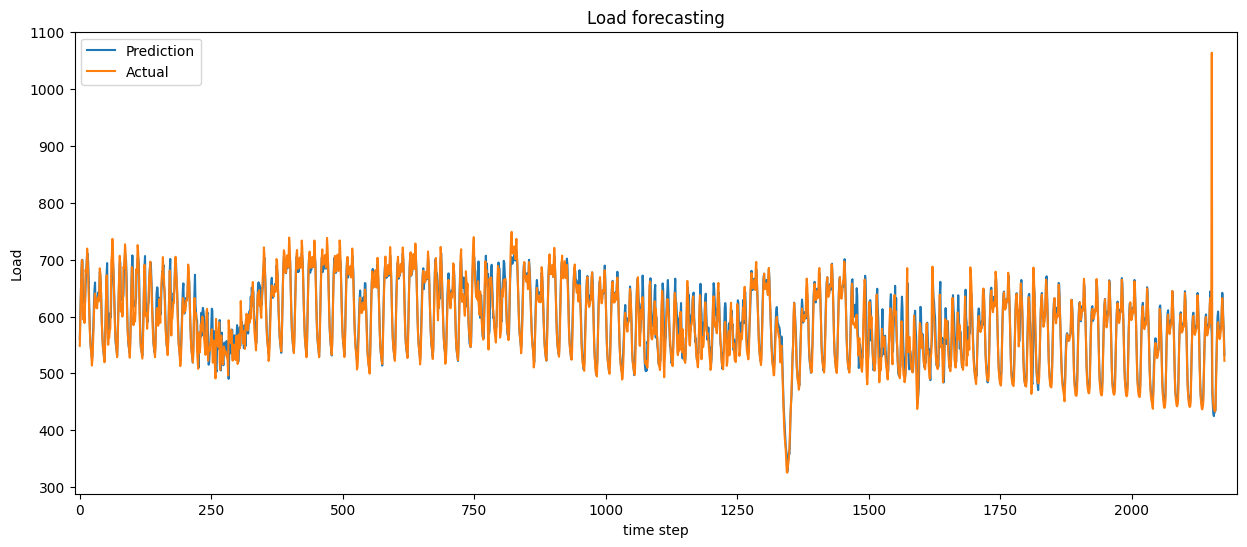

In [ ]:
plt.figure(figsize=(15,6))

plt.plot(y_pred_inv, label="Prediction" )
plt.plot(y_test_inv, label="Actual")
plt.legend()
plt.ylabel('Load')
plt.xlabel('time step' )
#plt.title ("Russell 2000 Adj close Price prediction- with MAE {:10.4f}".format(mae))
plt.title ('Load forecasting')

plt.xlim(
  xmin=-10, xmax=2200
)
#plt.show()


plt.savefig("PRECTOTCORR.svg")
plt.savefig("PRECTOTCORR.png", format="png", dpi=300)
plt.savefig('PRECTOTCORR.eps', format='eps')




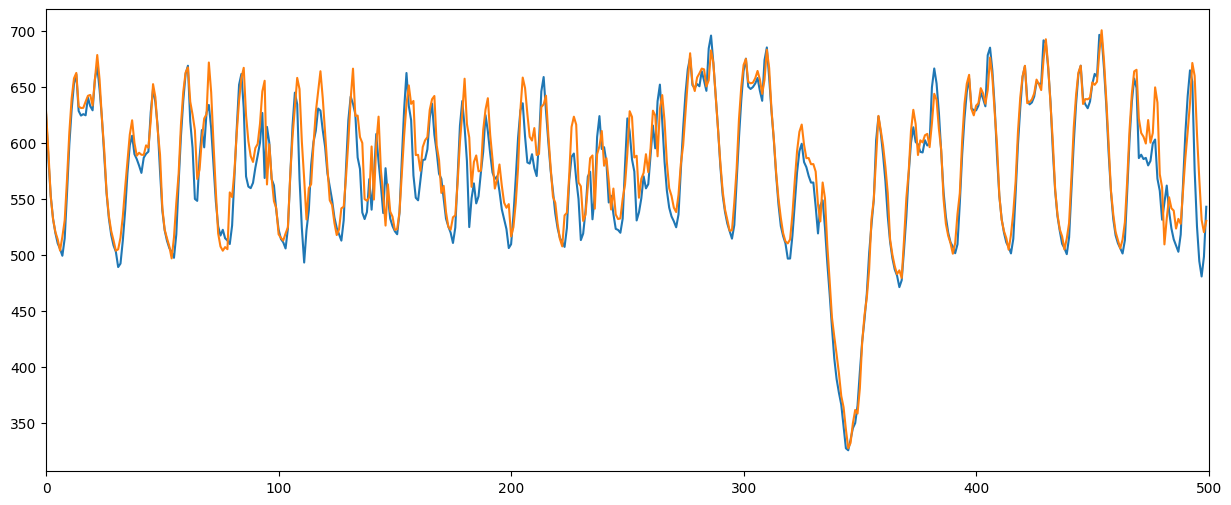

In [ ]:
#zoom in spikes


plt.figure(figsize=(15,6))

plt.plot(y_test_inv[1000:1500])
plt.plot(y_pred_inv[1000:1500])
plt.xlim(
  xmin=0, xmax=500
)
#plt.show()




plt.savefig("PRECTOTCORR_zoomin.svg")
plt.savefig("PRECTOTCORR_zoomin.png", format="png", dpi=300)
plt.savefig('PRECTOTCORR_zoomin.eps', format='eps')
